1. Apply either the Newton-Raphson method or the Secant method to find all real or complex roots for below functions
```python
f(x) = x**3 - x**2 + 2*x - 2
f(x) = 2*(x**4) + 6*(x**2) + 8
f(x) = -2 + 6.2*x - 4*(x**2) + 0.7*(x**3)
f(x) = x**4 - 2*(x**3) + 6*(x**2) - 2*x + 5
```
2. Use your own scientific judgement on how many iterations should be used until "diminishing returns" are present on an increase in accuracy. 
3. Plot the functions to choose root guesses appropriately.
4. You can apply any simplifications you deem appropriate prior to applying the numerical methods.


In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.misc import derivative
from sympy import Symbol

In [2]:
# helper function to plot each function
def plot_func(f,start,end):
    x = np.arange(start,end,0.1)
    y = np.fromiter(map(f,x),dtype=np.float64)
    fig = plt.figure()
    plt.plot(x,y,'-')
    plt.title("Function plot")

In [3]:
def Newton_Raphson_Root(x0,f,fprime,itermax,xr=None):
    prev = x0
    x_vals = []
    et_vals = []
    ea_vals = [None] # ignore the first value of percentage relative error list
    for i in range(itermax):
        # estimate x
        if i == 0:
            xi = x0
        else:
            top = f(prev)
            bottom = fprime(prev) 
            xi = prev-top/bottom
        x_vals.append(xi)
        
        # true perc relative error
        if xr is not None:
            et = (xr-xi)*100/xr
            et_vals.append(et)
            
        # percent relative error btw current appx and prev appx
        if i > 0: 
            ea = abs((xi - prev)*100/xi)
            ea_vals.append(ea)
        
        # update previous value to current value for next iteration
        prev = xi
    
    if et_vals:
        print("**True percentage relative error if the true value of root is provided**")
        print('|x|true perc relative error |')
        ets_iter = zip(x_vals,et_vals)
        for x, et in ets_iter:
            print('|', round(x,10),'|', round(et,10), '|')

        
    print("**Percentage relative error of approximation**")
    print('|x|perc relative error |')
    eas_iter = zip(x_vals[1:],ea_vals[1:]) # ignore the first value of percentage relative error list
    for x, ea in eas_iter:
        print('|', round(x,10),'|', round(ea,10), '|')


In [4]:
# Test function based on Example 6.3 in the book
def f(x):
    return math.exp(-x)-x
def fprime(x):
    return -math.exp(-x)-1

Newton_Raphson_Root(0,f,fprime,5,0.56714329)

**True percentage relative error if the true value of root is provided**
|x|true perc relative error |
| 0 | 100.0 |
| 0.5 | 11.8388582187 |
| 0.5663110032 | 0.1467507096 |
| 0.567143165 | 2.20341e-05 |
| 0.5671432904 | -7.23e-08 |
**Percentage relative error of approximation**
|x|perc relative error |
| 0.5 | 100.0 |
| 0.5663110032 | 11.7092909767 |
| 0.567143165 | 0.1467287078 |
| 0.5671432904 | 2.21064e-05 |


### 1. Use Newton_Raphson to solve f1
The function has root as a real number x = 1. However, it also has root as a complex number
```python
x**3 - x**2 + 2*x - 2 = x**2*(x-1) + 2*(x-1) = (x**2+2)*(x-1) 
```
- The first root is x = 1
- The second root is x^2 = -2 or x = sqrt(2) * sqrt(-1) = sqrt(2) * i

**Percentage relative error of approximation**
|x|perc relative error |
| -3.1379310345 | 59.3406593407 |
| -1.8416317263 | 70.3886281706 |
| -0.8755023348 | 110.3514351902 |
| -0.0179583003 | 4775.1959761743 |
| 0.9817278823 | 101.8292543837 |
| 1.0002238931 | 1.8491870551 |
| 1.0000000334 | 0.0223859671 |
| 1.0 | 3.3416e-06 |
| 1.0 | 0.0 |


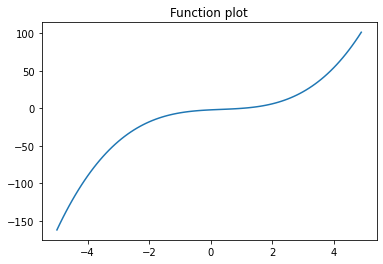

In [5]:
def f1(x):
    return x**3 - x**2 + 2*x - 2
def f1prime(x):
    return 3*x**2 - 2*x + 2
plot_func(f1,-5,5)
Newton_Raphson_Root(-5,f1,f1prime,10)

### 2. Use Newton_Raphson to solve f2:
The function cannot converge as based on the plot, it will never go down to 0. The root of the function is not a real number but an imaginary number i where i = sqrt(-1). Hence, 
```python
2*(x**4) + 6*(x**2) + 8 = 2*(i**4) + 6*(i**2) + 8 = -2 -6 + 8 = 0
```

**Percentage relative error of approximation**
|x|perc relative error |
| -0.2 | 400.0 |
| 3.1454545455 | 106.3583815029 |
| 2.2276638654 | 41.1996932907 |
| 1.47202025 | 51.333778549 |
| 0.7682097365 | 91.6169738567 |
| -0.1844624525 | 516.4585941601 |
| 3.4406860178 | 105.3612114436 |
| 2.4619915706 | 39.7521445216 |
| 1.6706768142 | 47.3649211921 |
| 0.9675222577 | 72.6758016002 |
| 0.1524348502 | 534.7119813806 |
| -4.2299389927 | 103.6037127347 |
| -3.0784669781 | 37.404072314 |
| -2.1740895833 | 41.5979820579 |
| -1.4257631495 | 52.4860271559 |
| -0.7194469792 | 98.174874693 |
| 0.2830485165 | 354.1779720348 |
| -2.0907757636 | 113.5379662158 |
| -1.3530829347 | 54.519409712 |
| -0.6405938182 | 111.2232269869 |
| 0.4624522365 | 238.5210769169 |
| -1.0160505821 | 145.5146864388 |
| -0.2229271495 | 355.7769585872 |
| 2.7813613393 | 108.0150373271 |
| 1.934164022 | 43.8017307559 |
| 1.2135818026 | 59.3764852001 |
| 0.479915724 | 152.8739405625 |
| -0.9483002672 | 150.6079920631 |
| 

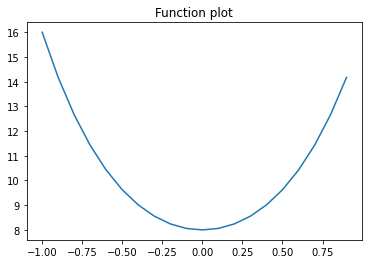

In [6]:
def f2(x):
    return 2*(x**4) + 6*(x**2) + 8
def f2prime(x):
    return 8*x**3 + 12*x
plot_func(f2,-1,1)
Newton_Raphson_Root(-1,f2,f2prime,50)

### 3. Use Newton_Raphson to solve f3:
* The function converges at root 0.4357322327 with starting x0 = -2
* The function converges at root 3.2785534816 with starting x0 = 5

**Percentage relative error of approximation**
|x|perc relative error |
| -0.8235294118 | 142.8571428571 |
| -0.1051702952 | 683.0437387657 |
| 0.2766088699 | 138.0213025162 |
| 0.4155401901 | 33.4339068742 |
| 0.4353402601 | 4.5481826064 |
| 0.4357320805 | 0.0899223283 |
| 0.4357322327 | 3.49239e-05 |
| 0.4357322327 | 0.0 |
| 0.4357322327 | 0.0 |
**Percentage relative error of approximation**
|x|perc relative error |
| 4.1176470588 | 21.4285714286 |
| 3.6010066451 | 14.3471108107 |
| 3.3535897385 | 7.3776736558 |
| 3.284185704 | 2.1132798443 |
| 3.2785890935 | 0.1707017955 |
| 3.278553483 | 0.0010861645 |
| 3.2785534816 | 4.39e-08 |
| 3.2785534816 | 0.0 |
| 3.2785534816 | 0.0 |


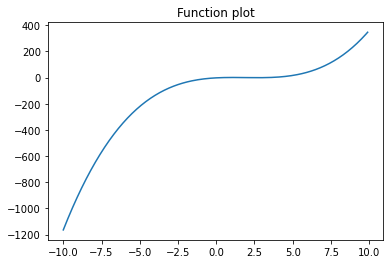

In [7]:
def f3(x):
    return  -2 + 6.2*x - 4*(x**2) + 0.7*(x**3)
def f3prime(x):
    return 6.2 - 8*x + 2.1*(x**2)
plot_func(f3,-10,10)
# Find root with start at -2
Newton_Raphson_Root(-2,f3,f3prime,10)
# Find root with start at 5
Newton_Raphson_Root(5,f3,f3prime,10)

### 4. Use Newton_Raphson to solve f4:
The function cannot converge as based on the plot, it will never go down to 0. Hence, there's no root for this function

**Percentage relative error of approximation**
|x|perc relative error |
| 1.5121629902 | 106.6130437425 |
| 0.6504731611 | 132.4712348875 |
| -0.6925841237 | 193.9197331924 |
| 0.0070843932 | 9876.1953926036 |
| 2.6104183377 | 99.7286108085 |
| 1.7458189956 | 49.5239967138 |
| 0.9054592966 | 92.8103231406 |
| -0.1494779398 | 705.7477762837 |
| 1.230877416 | 112.1440151467 |
| 0.3157353424 | 289.8446739488 |
| -3.4163608626 | 109.2418615908 |
| -2.3234782703 | 47.0364886228 |
| -1.4673442807 | 58.3458156927 |
| -0.7630722733 | 92.2942730517 |
| -0.0784101252 | 873.1807864783 |
| 1.664934382 | 104.7095024322 |
| 0.8190254301 | 103.2823793763 |
| -0.3037561581 | 369.6325352942 |
| 0.682758671 | 144.4895350261 |
| -0.6048573665 | 212.8792850686 |
| 0.123044146 | 591.5775240063 |
| 8.1006186087 | 98.481052473 |
| 6.1170849284 | 32.4261262269 |
| 4.5961631902 | 33.0911169857 |
| 3.4060342134 | 34.9417798598 |
| 2.437204953 | 39.7516531869 |
| 1.5870514798 | 53.5681094172 |
| 0.7340282446 | 1

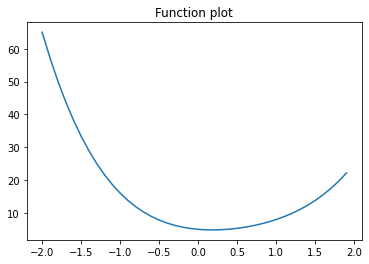

In [8]:
def f4(x):
    return x**4 - 2*(x**3) + 6*(x**2) - 2*x + 5
def f4prime(x):
    return 4*(x**3) - 6*(x**2) + 12*x - 2
plot_func(f4,-2,2)
Newton_Raphson_Root(-0.1,f4,f4prime,50)

### Solution
1. x = 1, -i*sqrt(2), i*sqrt(2)
2. -.5i(sqrt(7)-i), .5(1-i*sqrt(7), .5i(sqrt(7)+i), .5(1+i*sqrt(7)
3. .435732, 2, 3.27855
4. -i, i, 1-2i, 1+2i